In [ ]:
import os
import sys
sys.path.append('/content')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
folder_path = 'datasets'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
merged_df = pd.concat([pd.read_csv(os.path.join(folder_path, file)).assign(SOURCE_FILE = file) for file in file_list], ignore_index = True)
merged_df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,SOURCE_FILE
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-PortScan.pcap_IS...


In [ ]:
merged_df.shape

(2830743, 80)

In [ ]:
merged_df.columns = merged_df.columns.str.strip()
merged_df.columns = merged_df.columns.str.upper()
merged_df.columns = merged_df.columns.str.replace(' ', '_')
merged_df.columns

Index(['DESTINATION_PORT', 'FLOW_DURATION', 'TOTAL_FWD_PACKETS',
       'TOTAL_BACKWARD_PACKETS', 'TOTAL_LENGTH_OF_FWD_PACKETS',
       'TOTAL_LENGTH_OF_BWD_PACKETS', 'FWD_PACKET_LENGTH_MAX',
       'FWD_PACKET_LENGTH_MIN', 'FWD_PACKET_LENGTH_MEAN',
       'FWD_PACKET_LENGTH_STD', 'BWD_PACKET_LENGTH_MAX',
       'BWD_PACKET_LENGTH_MIN', 'BWD_PACKET_LENGTH_MEAN',
       'BWD_PACKET_LENGTH_STD', 'FLOW_BYTES/S', 'FLOW_PACKETS/S',
       'FLOW_IAT_MEAN', 'FLOW_IAT_STD', 'FLOW_IAT_MAX', 'FLOW_IAT_MIN',
       'FWD_IAT_TOTAL', 'FWD_IAT_MEAN', 'FWD_IAT_STD', 'FWD_IAT_MAX',
       'FWD_IAT_MIN', 'BWD_IAT_TOTAL', 'BWD_IAT_MEAN', 'BWD_IAT_STD',
       'BWD_IAT_MAX', 'BWD_IAT_MIN', 'FWD_PSH_FLAGS', 'BWD_PSH_FLAGS',
       'FWD_URG_FLAGS', 'BWD_URG_FLAGS', 'FWD_HEADER_LENGTH',
       'BWD_HEADER_LENGTH', 'FWD_PACKETS/S', 'BWD_PACKETS/S',
       'MIN_PACKET_LENGTH', 'MAX_PACKET_LENGTH', 'PACKET_LENGTH_MEAN',
       'PACKET_LENGTH_STD', 'PACKET_LENGTH_VARIANCE', 'FIN_FLAG_COUNT',
       'SYN_FLAG_CO

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   DESTINATION_PORT             int64  
 1   FLOW_DURATION                int64  
 2   TOTAL_FWD_PACKETS            int64  
 3   TOTAL_BACKWARD_PACKETS       int64  
 4   TOTAL_LENGTH_OF_FWD_PACKETS  int64  
 5   TOTAL_LENGTH_OF_BWD_PACKETS  int64  
 6   FWD_PACKET_LENGTH_MAX        int64  
 7   FWD_PACKET_LENGTH_MIN        int64  
 8   FWD_PACKET_LENGTH_MEAN       float64
 9   FWD_PACKET_LENGTH_STD        float64
 10  BWD_PACKET_LENGTH_MAX        int64  
 11  BWD_PACKET_LENGTH_MIN        int64  
 12  BWD_PACKET_LENGTH_MEAN       float64
 13  BWD_PACKET_LENGTH_STD        float64
 14  FLOW_BYTES/S                 float64
 15  FLOW_PACKETS/S               float64
 16  FLOW_IAT_MEAN                float64
 17  FLOW_IAT_STD                 float64
 18  FLOW_IAT_MAX                 int64  
 19  

In [ ]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DESTINATION_PORT,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
FLOW_DURATION,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
TOTAL_FWD_PACKETS,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
TOTAL_BACKWARD_PACKETS,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
TOTAL_LENGTH_OF_FWD_PACKETS,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
TOTAL_LENGTH_OF_BWD_PACKETS,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
FWD_PACKET_LENGTH_MAX,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
FWD_PACKET_LENGTH_MIN,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
FWD_PACKET_LENGTH_MEAN,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
FWD_PACKET_LENGTH_STD,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [ ]:
merged_df[['FLOW_BYTES/S', 'FLOW_PACKETS/S']] = merged_df[['FLOW_BYTES/S', 'FLOW_PACKETS/S']].replace([np.inf, -np.inf], np.nan)
merged_df[['FLOW_BYTES/S', 'FLOW_PACKETS/S']] = merged_df[['FLOW_BYTES/S', 'FLOW_PACKETS/S']].fillna(merged_df[['FLOW_BYTES/S', 'FLOW_PACKETS/S']].mean())
merged_df.isnull().sum()

,0
DESTINATION_PORT,0
FLOW_DURATION,0
TOTAL_FWD_PACKETS,0
TOTAL_BACKWARD_PACKETS,0
TOTAL_LENGTH_OF_FWD_PACKETS,0
TOTAL_LENGTH_OF_BWD_PACKETS,0
FWD_PACKET_LENGTH_MAX,0
FWD_PACKET_LENGTH_MIN,0
FWD_PACKET_LENGTH_MEAN,0
FWD_PACKET_LENGTH_STD,0


In [ ]:
merged_df.drop(columns = ['FWD_HEADER_LENGTH.1'], inplace = True)
merged_df = merged_df.select_dtypes(include=['int64', 'float64'])
merged_df.shape

(2830743, 77)

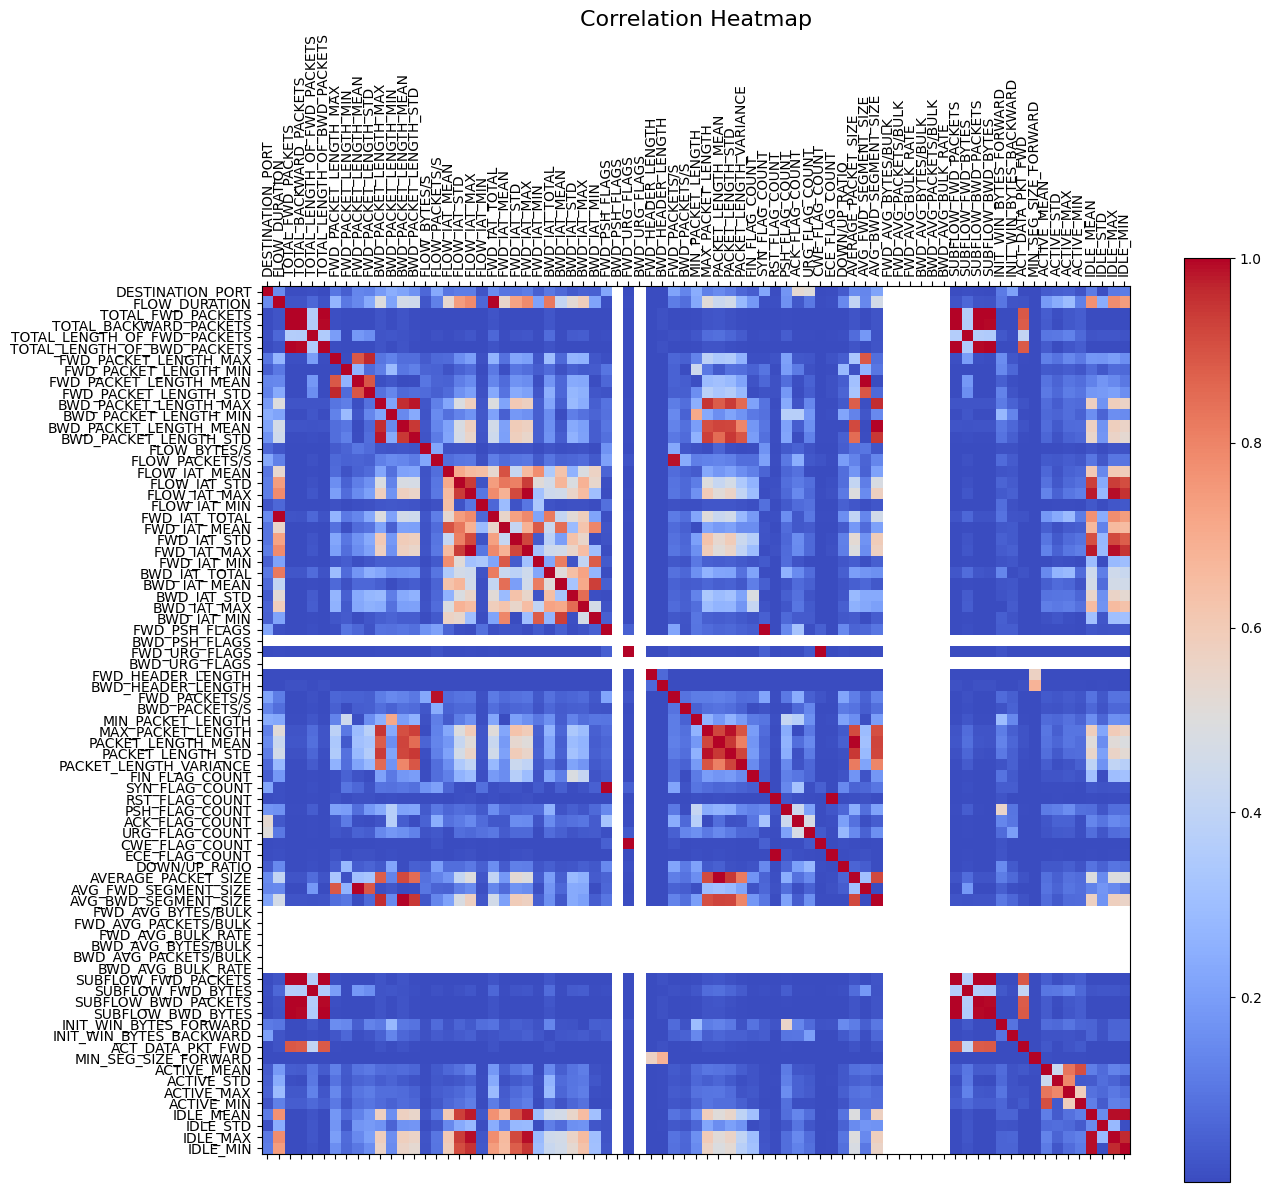

In [ ]:
corr_matrix = merged_df.corr().abs()

fig, ax = plt.subplots(figsize=(14, 12))
cax = ax.matshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(cax)

# Set tick marks and labels
ticks = np.arange(0, len(corr_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Highly correlated columns to drop:", to_drop)

Highly correlated columns to drop: ['TOTAL_BACKWARD_PACKETS', 'TOTAL_LENGTH_OF_BWD_PACKETS', 'FWD_PACKET_LENGTH_MEAN', 'FWD_PACKET_LENGTH_STD', 'BWD_PACKET_LENGTH_MEAN', 'BWD_PACKET_LENGTH_STD', 'FLOW_IAT_MAX', 'FWD_IAT_TOTAL', 'FWD_IAT_MEAN', 'FWD_IAT_STD', 'FWD_IAT_MAX', 'FWD_IAT_MIN', 'BWD_IAT_MIN', 'FWD_PACKETS/S', 'MAX_PACKET_LENGTH', 'PACKET_LENGTH_MEAN', 'PACKET_LENGTH_STD', 'PACKET_LENGTH_VARIANCE', 'SYN_FLAG_COUNT', 'CWE_FLAG_COUNT', 'ECE_FLAG_COUNT', 'AVERAGE_PACKET_SIZE', 'AVG_FWD_SEGMENT_SIZE', 'AVG_BWD_SEGMENT_SIZE', 'SUBFLOW_FWD_PACKETS', 'SUBFLOW_FWD_BYTES', 'SUBFLOW_BWD_PACKETS', 'SUBFLOW_BWD_BYTES', 'ACT_DATA_PKT_FWD', 'ACTIVE_MIN', 'IDLE_MEAN', 'IDLE_MAX', 'IDLE_MIN']


In [ ]:
columns_to_drop = [
    'TOTAL_BACKWARD_PACKETS',
    'TOTAL_LENGTH_OF_BWD_PACKETS',
    'FWD_PACKET_LENGTH_MEAN',
    'FWD_PACKET_LENGTH_STD',
    'BWD_PACKET_LENGTH_MEAN',
    'BWD_PACKET_LENGTH_STD',
    'FLOW_IAT_MAX',
    'FWD_IAT_TOTAL',
    'FWD_IAT_MEAN',
    'FWD_IAT_STD',
    'FWD_IAT_MAX',
    'FWD_IAT_MIN',
    'BWD_IAT_MIN',
    'FWD_PACKETS/S',
    'MAX_PACKET_LENGTH',
    'PACKET_LENGTH_MEAN',
    'PACKET_LENGTH_STD',
    'PACKET_LENGTH_VARIANCE',
    'SYN_FLAG_COUNT',
    'CWE_FLAG_COUNT',
    'ECE_FLAG_COUNT',
    'AVG_FWD_SEGMENT_SIZE',
    'AVG_BWD_SEGMENT_SIZE',
    'SUBFLOW_FWD_BYTES',
    'SUBFLOW_BWD_PACKETS',
    'SUBFLOW_BWD_BYTES',
    'ACTIVE_MIN',
    'IDLE_MEAN',
    'IDLE_MAX',
    'IDLE_MIN'
]

merged_df = merged_df.drop(columns = columns_to_drop)
merged_df.shape

(2830743, 47)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df[merged_df.columns])
merged_df = pd.DataFrame(scaled_data, columns = merged_df.columns)
merged_df.head(5)

,DESTINATION_PORT,FLOW_DURATION,TOTAL_FWD_PACKETS,TOTAL_LENGTH_OF_FWD_PACKETS,FWD_PACKET_LENGTH_MAX,FWD_PACKET_LENGTH_MIN,BWD_PACKET_LENGTH_MAX,BWD_PACKET_LENGTH_MIN,FLOW_BYTES/S,FLOW_PACKETS/S,FLOW_IAT_MEAN,FLOW_IAT_STD,FLOW_IAT_MIN,BWD_IAT_TOTAL,BWD_IAT_MEAN,BWD_IAT_STD,BWD_IAT_MAX,FWD_PSH_FLAGS,BWD_PSH_FLAGS,FWD_URG_FLAGS,BWD_URG_FLAGS,FWD_HEADER_LENGTH,BWD_HEADER_LENGTH,BWD_PACKETS/S,MIN_PACKET_LENGTH,FIN_FLAG_COUNT,RST_FLAG_COUNT,PSH_FLAG_COUNT,ACK_FLAG_COUNT,URG_FLAG_COUNT,DOWN/UP_RATIO,AVERAGE_PACKET_SIZE,FWD_AVG_BYTES/BULK,FWD_AVG_PACKETS/BULK,FWD_AVG_BULK_RATE,BWD_AVG_BYTES/BULK,BWD_AVG_PACKETS/BULK,BWD_AVG_BULK_RATE,SUBFLOW_FWD_PACKETS,INIT_WIN_BYTES_FORWARD,INIT_WIN_BYTES_BACKWARD,ACT_DATA_PKT_FWD,MIN_SEG_SIZE_FORWARD,ACTIVE_MEAN,ACTIVE_STD,ACTIVE_MAX,IDLE_STD
0,-0.440256,-0.401718,0.042204,0.211605,0.346354,-0.31014,0.054024,-0.596109,-0.057242,-0.278375,-0.284692,-0.349896,-0.055039,-0.333239,-0.202358,-0.233550,-0.266889,-0.220701,0.0,-0.010549,0.0,0.001298,0.002546,-0.182441,-0.651188,-0.191513,-0.015569,1.534572,-0.679452,-0.323661,0.465104,-0.237542,0.0,0.0,0.0,0.0,0.0,0.0,0.042204,1.548964,-0.206510,0.029197,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
1,-0.440256,-0.400143,0.042204,0.211605,0.346354,-0.31014,0.054024,-0.596109,-0.057254,-0.278386,-0.284552,-0.349796,-0.055038,-0.331647,-0.202238,-0.233279,-0.266878,-0.220701,0.0,-0.010549,0.0,0.001298,0.002546,-0.182478,-0.651188,-0.191513,-0.015569,1.534572,-0.679452,-0.323661,0.465104,-0.237542,0.0,0.0,0.0,0.0,0.0,0.0,0.042204,1.548964,-0.206510,0.029197,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
2,-0.440256,-0.439342,-0.011153,-0.054965,-0.289465,-0.31014,-0.447423,-0.596109,-0.057535,-0.229482,-0.288000,-0.362829,-0.054984,-0.344294,-0.203189,-0.236678,-0.272986,-0.220701,0.0,-0.010549,0.0,0.001236,0.001587,-0.019532,-0.651188,-0.191513,-0.015569,-0.651648,1.471773,3.089652,0.465104,-0.578507,0.0,0.0,0.0,0.0,0.0,0.0,-0.011153,-0.467255,-0.206510,-0.008514,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
3,-0.440256,-0.400615,0.042204,0.218010,0.346354,-0.31014,0.054024,-0.596109,-0.057258,-0.278389,-0.284509,-0.349585,-0.055039,-0.332224,-0.202237,-0.232861,-0.264927,-0.220701,0.0,-0.010549,0.0,0.001298,0.002502,-0.182508,-0.651188,-0.191513,-0.015569,1.534572,-0.679452,-0.323661,0.465104,-0.238620,0.0,0.0,0.0,0.0,0.0,0.0,0.042204,1.548964,-0.206510,0.029197,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
4,1.494480,-0.439345,-0.011153,-0.054965,-0.289465,-0.31014,-0.447423,-0.596109,-0.057535,-0.125422,-0.288027,-0.362827,-0.055029,-0.344292,-0.203184,-0.236678,-0.272983,-0.220701,0.0,-0.010549,0.0,0.001236,0.001609,0.497457,-0.651188,-0.191513,-0.015569,-0.651648,1.471773,3.089652,1.934629,-0.578507,0.0,0.0,0.0,0.0,0.0,0.0,-0.011153,-0.470533,-0.200953,-0.008514,0.002556,-0.125734,-0.104565,-0.149326,-0.10946
